搞清各个矩阵的形状及维数的变化

```
A(15x1)*w1(1x10)+b1(1*10) = B(15x10)
B(15x10)*w2(10x1)+b2(15x1) = C(15x1)
A B C
```


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


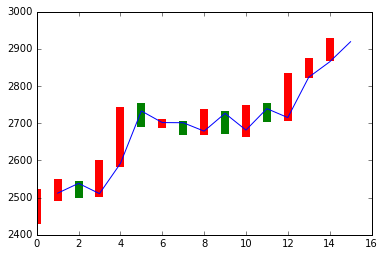

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
date = np.linspace(1,15,15)
endPrice = np.array([2511.90,2538.26,2510.68,2591.66,2732.98,2701.69,2701.29,2678.67,2726.50,2681.50,2739.17,2715.07,2823.58,2864.90,2919.08]
)
beginPrice = np.array([2438.71,2500.88,2534.95,2512.52,2594.04,2743.26,2697.47,2695.24,2678.23,2722.13,2674.93,2744.13,2717.46,2832.73,2877.40])
print(date)
plt.figure()
for i in range(0,15):
    # 1 柱状图
    dateOne = np.zeros([2])
    dateOne[0] = i;
    dateOne[1] = i;
    priceOne = np.zeros([2])
    priceOne[0] = beginPrice[i]
    priceOne[1] = endPrice[i]
    if endPrice[i]>beginPrice[i]:
        plt.plot(dateOne,priceOne,'r',lw=8)
    else:
        plt.plot(dateOne,priceOne,'g',lw=8)
# 输入的日期
dateNormal = np.zeros([15,1])
# 输出的价格
priceNormal = np.zeros([15,1])

# 进行归一化处理
for i in range(0,15):
    # 日期最大14
    dateNormal[i,0] = i/14.0;
    # 价格不会超出3000
    priceNormal[i,0] = endPrice[i]/3000.0
    
# 一个n行一列的占位符
x = tf.placeholder(tf.float32,[None,1])
# 一个n行一列的占位符
y = tf.placeholder(tf.float32,[None,1])

# 隐藏层B
# w1是会被修改的。所以定义一个变量。
# 初值随机，一行十列，0到1之间
w1 = tf.Variable(tf.random_uniform([1,10],0,1))

# 偏置矩阵一行十列
b1 = tf.Variable(tf.zeros([1,10]))

# wb1也就是隐藏层的输出值是x乘以w1加上b1
wb1 = tf.matmul(x,w1)+b1
# 激励函数增加非线性元素。
layer1 = tf.nn.relu(wb1) # 激励函数

# 输出层
w2 = tf.Variable(tf.random_uniform([10,1],0,1))
b2 = tf.Variable(tf.zeros([15,1]))

wb2 = tf.matmul(layer1,w2)+b2
layer2 = tf.nn.relu(wb2) #完成简单映射

# 损失函数(真实值-预测值)的平方。开放出来的结果再进行一个均值
loss = tf.reduce_mean(tf.square(y-layer2))#y 真实 layer2 计算

# 梯度下降法，梯度下降法。参数为学习率，目标是最小化loss
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    # 初始化所有的全局变量
    sess.run(tf.global_variables_initializer())
    # 程序终止: for循环次数
    for i in range(0,10000):
        # x，y值填入归一化之后的x，y
        sess.run(train_step,feed_dict={x:dateNormal,y:priceNormal})
    
    # 进行预测验证
    # w1w2 b1b2  A + wb -->layer2 得到新的预测值
    pred = sess.run(layer2,feed_dict={x:dateNormal})
    predPrice = np.zeros([15,1])
    # 还原当前价格。（反归一化）
    for i in range(0,15):
        predPrice[i,0]=(pred*3000)[i,0]
    plt.plot(date,predPrice,'b',lw=1)
plt.show()